In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Census Income')
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### Pre-Processing

In [3]:
df.isnull().sum().any()

False

We see that the Dataset does not have any null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We see that we have 32560 rows, off which 9 are object type

In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [7]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

We see that we have '?' in Workclass

In [8]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [10]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [11]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

We have '?' in Occupation as well

In [12]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [15]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [16]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [17]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

We have "?" in Native_country

We see that we have '?' in 'Native_country','Occupation' and 'Workclass', which can be termed as NaN values.

In [18]:
df['Occupation']=df['Occupation'].replace(' ?',np.nan)

In [19]:
df['Workclass']=df['Workclass'].replace(' ?',np.nan)

In [20]:
df['Native_country']=df['Native_country'].replace(' ?',np.nan)

In [21]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

We have converted '?' into Nan values

#### Filling the Nan Values in  Occupation based on Education

In [22]:
Education_occupation = df.pivot_table(values='Occupation',index='Education',aggfunc=(lambda x:x.mode()))
Education_occupation

,Occupation
Education,
10th,Other-service
11th,Other-service
12th,Other-service
1st-4th,Other-service
5th-6th,Other-service
7th-8th,Craft-repair
9th,Other-service
Assoc-acdm,Adm-clerical
Assoc-voc,Craft-repair


In [23]:
missing_values = df['Occupation'].isnull()

In [24]:
for i,item in enumerate(df['Education']):
    if missing_values[i]:
        df['Occupation'][i] = Education_occupation.loc[item]['Occupation']

In [25]:
df['Occupation'].isnull().sum()

0

We do not have Nan Values in Occupation anymore

#### Filling the Nan Values in Workclass based on Occupation

In [26]:
workclass_occupation = df.pivot_table(values='Workclass',index='Occupation',aggfunc=(lambda x:x.mode()))
workclass_occupation

,Workclass
Occupation,
Adm-clerical,Private
Armed-Forces,Federal-gov
Craft-repair,Private
Exec-managerial,Private
Farming-fishing,Private
Handlers-cleaners,Private
Machine-op-inspct,Private
Other-service,Private
Priv-house-serv,Private


In [27]:
missing_value = df['Workclass'].isnull()

In [28]:
for i, item in enumerate(df['Occupation']):
    if missing_value[i]:
            df['Workclass'][i] = workclass_occupation.loc[item]['Workclass']

In [29]:
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [30]:
df.isnull().sum()

Age                 0
Workclass           0
Fnlwgt              0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Native_country    583
Income              0
dtype: int64

#### Lets fill the Missing values in Native Country with Mode

In [31]:
df['Native_country'].mode()

0     United-States
dtype: object

In [32]:
df['Native_country'] = df['Native_country'].fillna(' United-States')

In [33]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We do not have Null values anymore

In [34]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [35]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 - We see that the Capital_gain and Capital_loss has a lot of variance for mean and median
 - We also see a huge difference between 75% and max for Capital_gain and Capital_loss which would result in outliers.

In [36]:
non_cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes != 'object':
        non_cat_columns.append(i)
non_cat_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [37]:
cat_columns = []
for i in df.dtypes.index:
    if df[i].dtypes == 'object':
        cat_columns.append(i)
cat_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

### Visualization

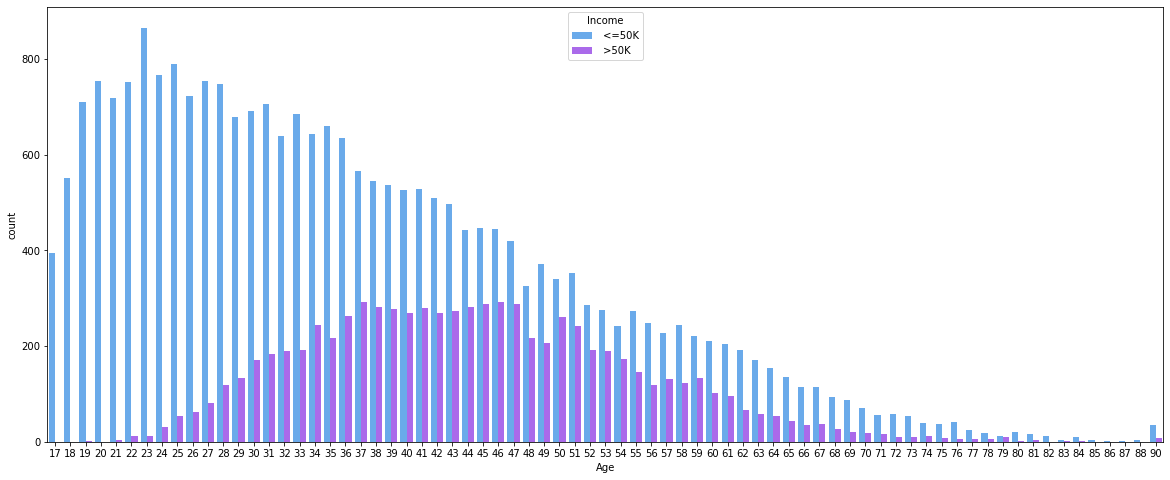

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(df['Age'],hue=df['Income'],palette='cool')
plt.show()

- We see that the majority if the population earns <= 50k.
- A very Large amount of people below the age group 25 earn <= 50k.
- People earning >50k are usually in the age group 30-60.

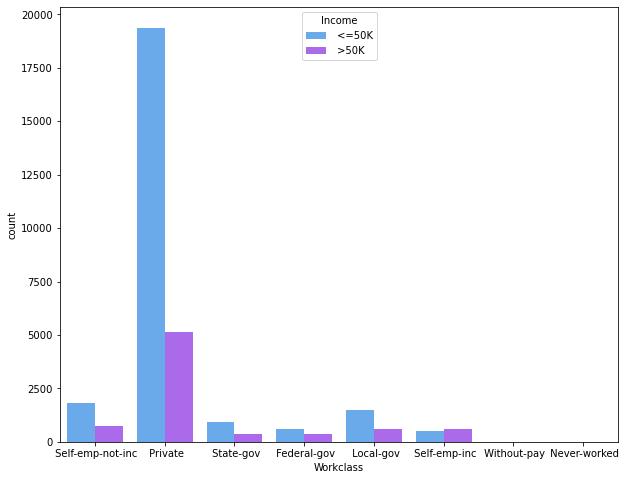

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df['Workclass'],hue=df['Income'],palette='cool')
plt.show()

- We see that people working in Private sector tend to have the highest count of people with salary <=50k.
- Self Employed people have higher tendency to earn salary above 50k.

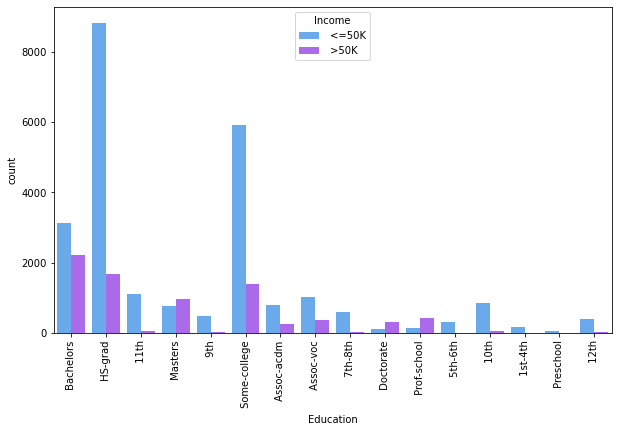

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(df['Education'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

- We see HS-grad have the highest count earning <=50k.
- People having Doctorate,Masters and Prof-school have a higher tendency of getting salary above 50k

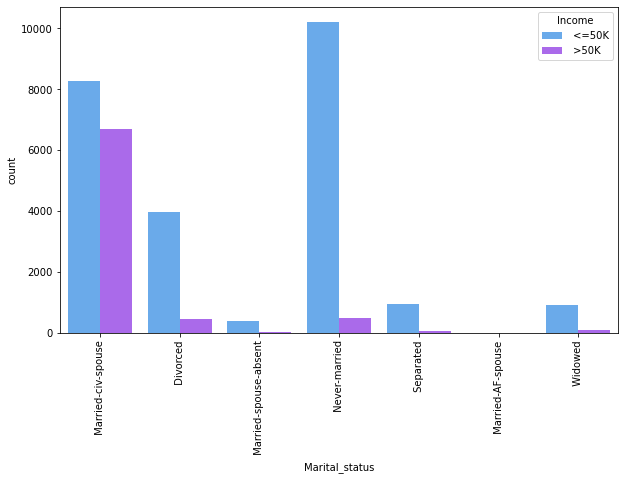

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(df['Marital_status'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

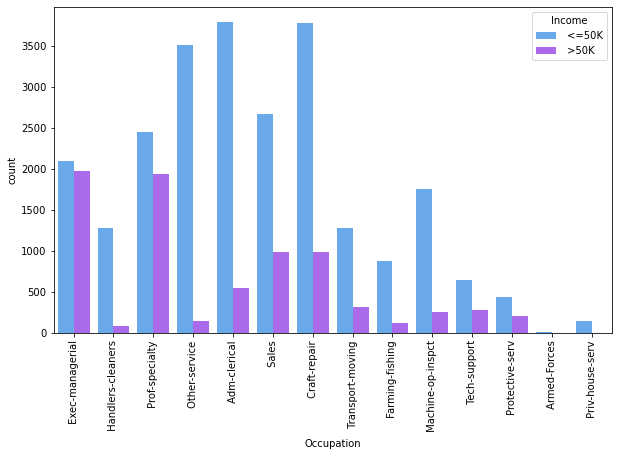

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(df['Occupation'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

- We see Craft-repair,Adm-Clerical have the highest count of people earning <=50k.
- People working as Exec-managerial and Prof-speciality tend to have higher salaries.

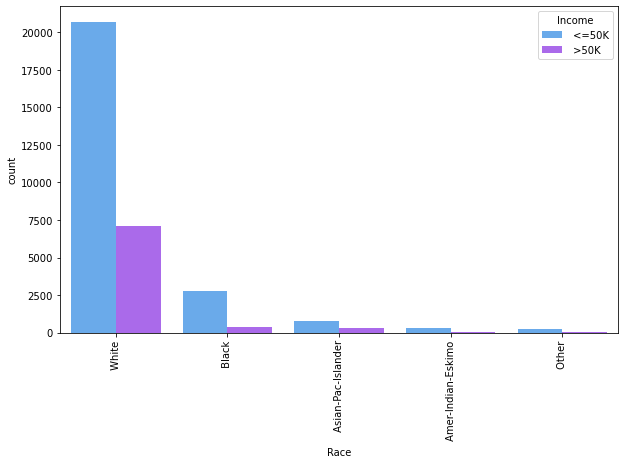

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(df['Race'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

We see the majority of the population consists of whites and whites tend to earn higher than other races

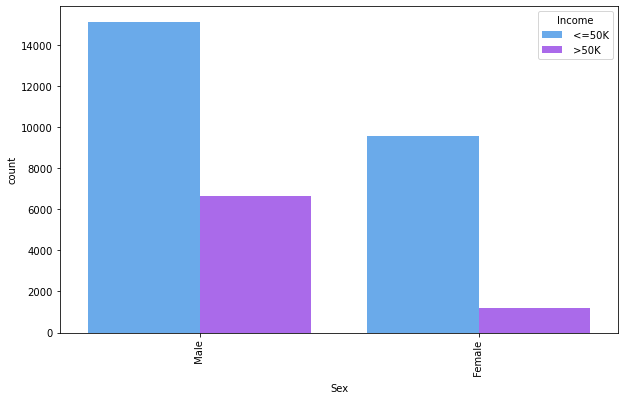

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df['Sex'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

We see that the male tend to earn higher than female

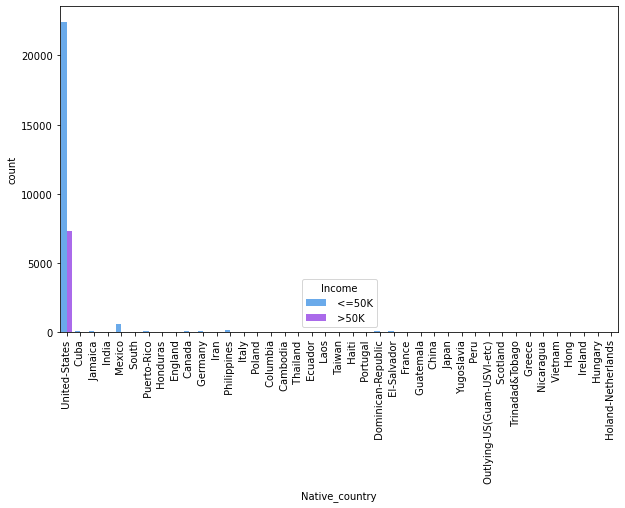

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(df['Native_country'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

We see people from United States tend to earn higher and people from Mexico and Phillipines tend to have lower salaries

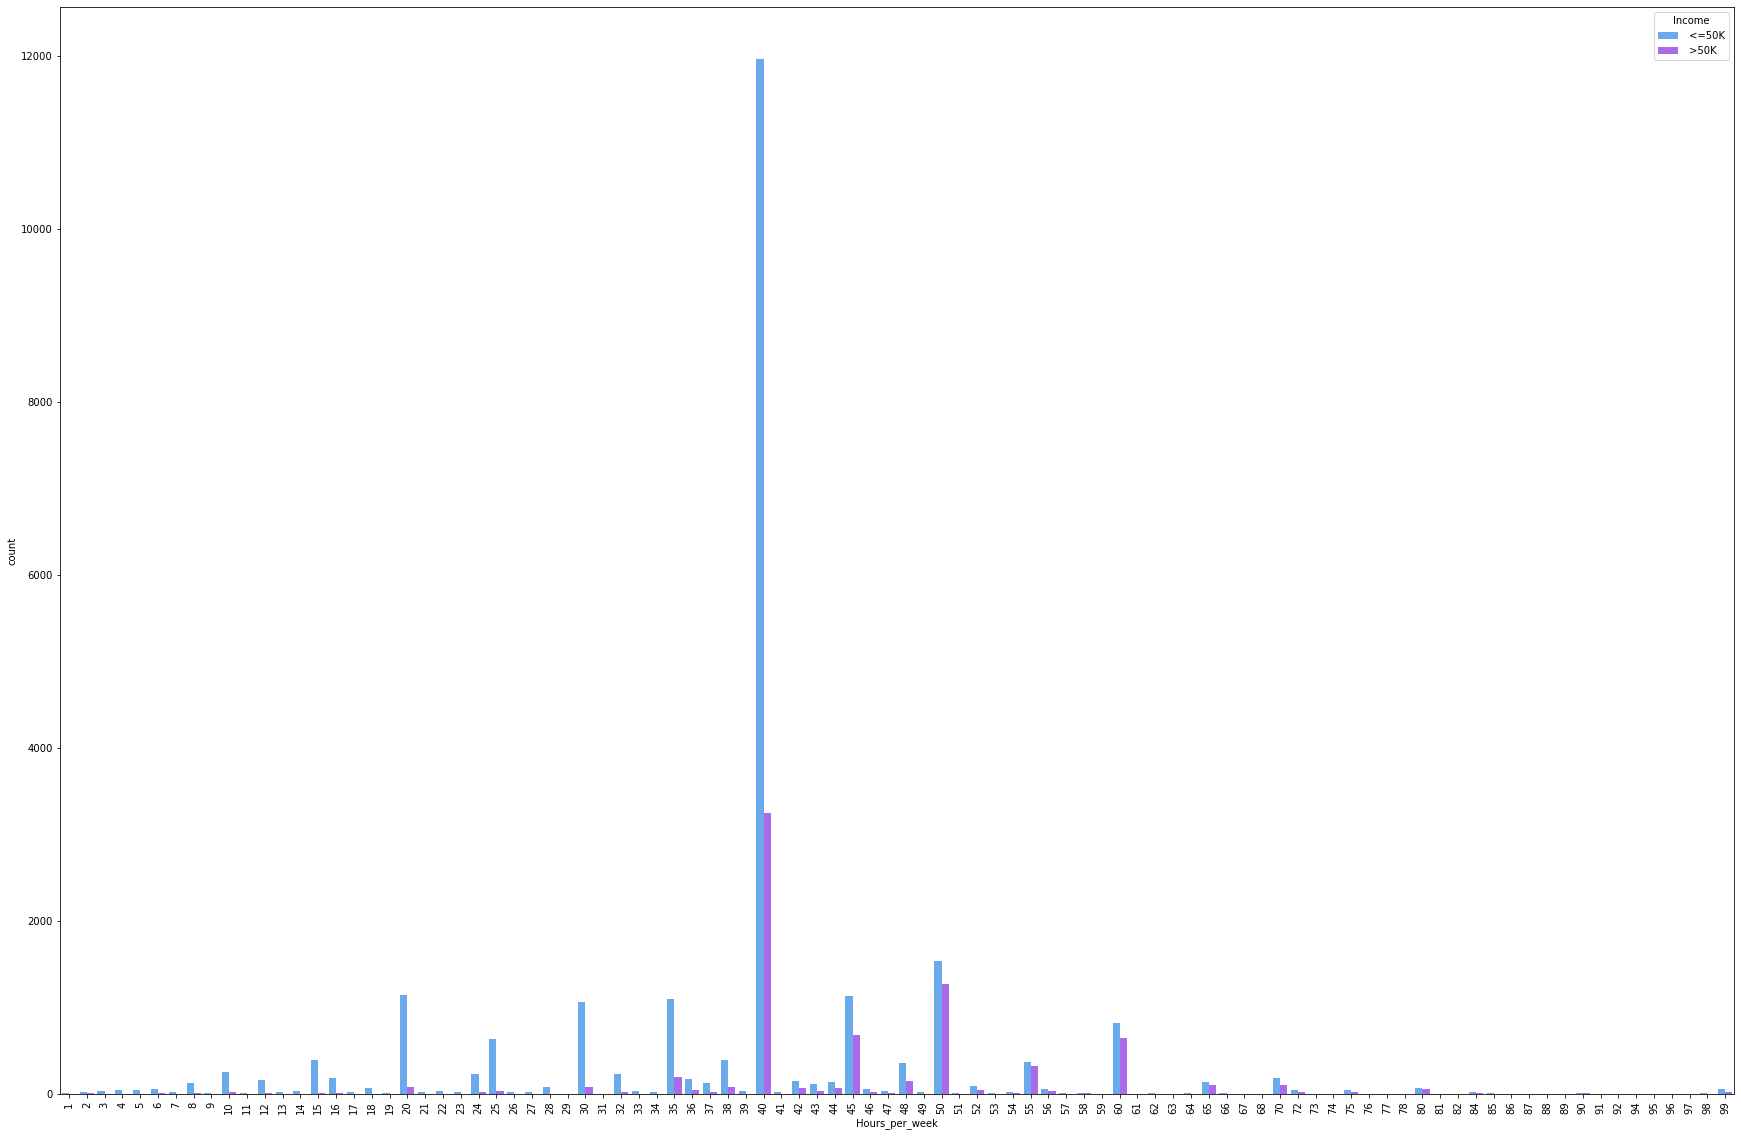

In [46]:
plt.figure(figsize=(30,20))
sns.countplot(df['Hours_per_week'],hue=df['Income'],palette='cool')
plt.xticks(rotation=90)
plt.show()

- We see prople working less than 40 hrs per week tend to have salaries <= 50k.
- People having more than 40 hrs per week have a higher chance of salary above 50k.

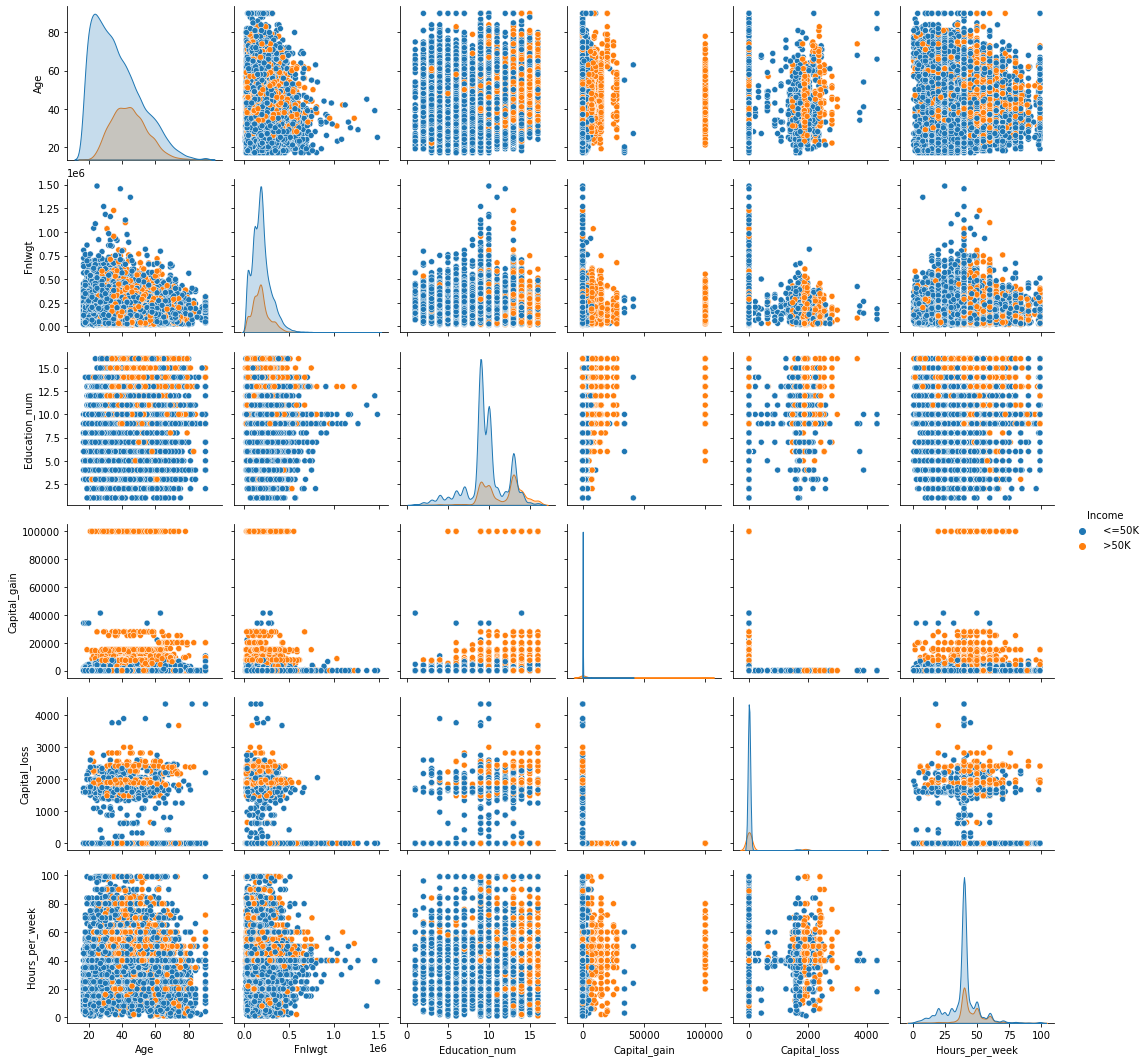

In [47]:
sns.pairplot(df,diag_kind='kde',hue='Income')
plt.show()

In [40]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We see that Education_num is a representation of Education and represent one and the same thing so we could drop Education

In [41]:
df.drop('Education',axis=1,inplace=True)

In [42]:
df[df['Capital_gain']==0].shape

(29849, 14)

In [43]:
nonzero_values_Capital_gain = (32560-29849)/32560*100
nonzero_values_Capital_gain

8.326167076167076

In [44]:
df[df['Capital_loss']==0].shape

(31041, 14)

In [45]:
nonzero_values_Capital_loss = (32560-31041)/32560*100
nonzero_values_Capital_loss

4.6652334152334145

We see that we just have 8.3 and 4.7 percent of non zero values in Capital_gain and Capital_loss. We may consider dropping them with further analysis.

### Checking skewness

In [46]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

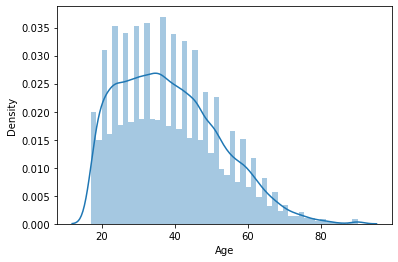

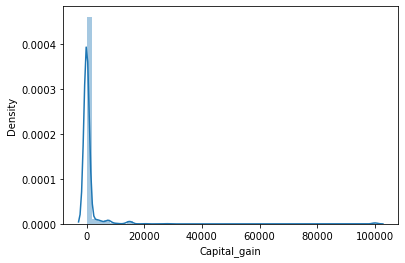

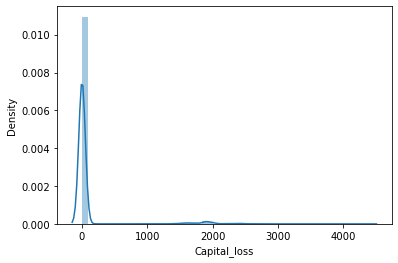

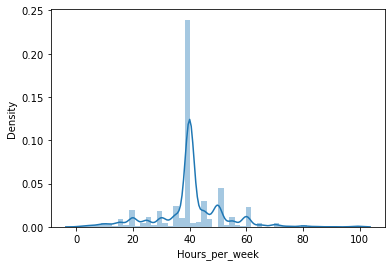

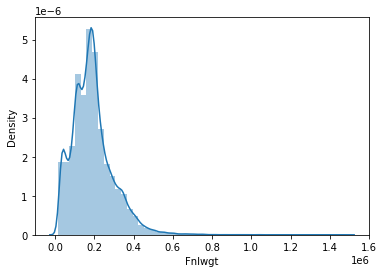

In [47]:
non_cat_columns = ['Age','Capital_gain','Capital_loss','Hours_per_week','Fnlwgt']

for i in non_cat_columns:
    sns.distplot(df[i])
    plt.show()

In [48]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

- Lets set skewness threshold as +/-0.5
- We see that the data is predominantly right skewed.
- Fnlwgt,Capital_gain,Capital_loss has a higher skewness than thresold.

### Checking outliers

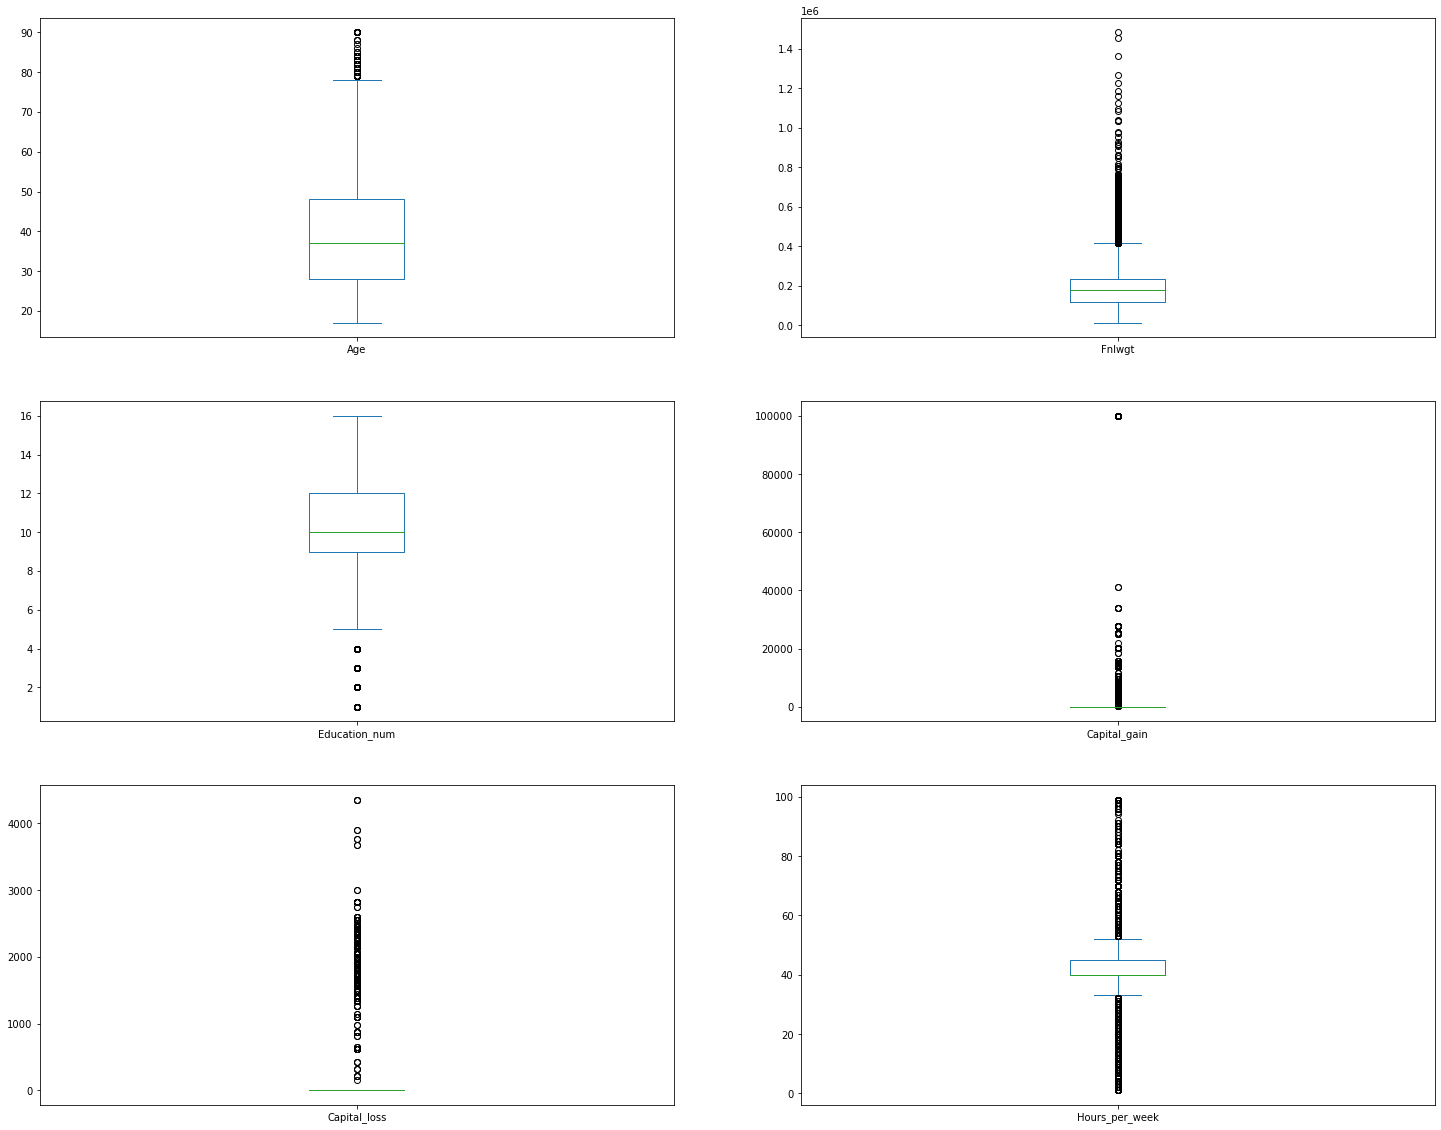

In [49]:
df.plot(kind='box',subplots=True,layout=(3,2),figsize=(25,20),sharex=True)
plt.show()

We see a outlier in Fnlwgt,Capital_gain and Capital_loss

We see that large amount of outliers,skewness present in 'Capital_gain','Capital_loss' and it also has more than 90% values as 0, so we could drop it.

In [50]:
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

### Checking Correlation

In [51]:
df.corr()

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.148127
Hours_per_week,0.068756,-0.018770,0.148127,1.000000


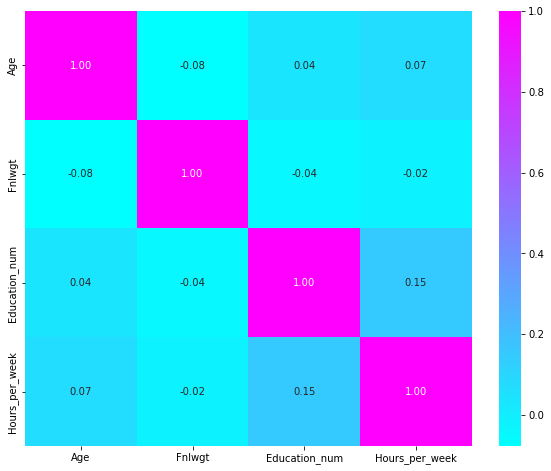

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

### Encoding Object type columns

In [53]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [54]:
### OneHot Encoding
df = pd.get_dummies(df,columns=['Sex'])
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Native_country,Income,Sex_ Female,Sex_ Male
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,13,United-States,<=50K,0,1
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,40,United-States,<=50K,0,1
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,United-States,<=50K,0,1
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,40,Cuba,<=50K,1,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,40,United-States,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,38,United-States,<=50K,1,0
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,40,United-States,>50K,0,1
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,40,United-States,<=50K,1,0
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,20,United-States,<=50K,0,1


In [55]:
obj = ['Workclass',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Native_country']

from sklearn.preprocessing import OrdinalEncoder
oenc = OrdinalEncoder()
for i in obj:
    df[i] = oenc.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Native_country,Income,Sex_ Female,Sex_ Male
0,50,5.0,83311,13,2.0,3.0,0.0,4.0,13,38.0,<=50K,0,1
1,38,3.0,215646,9,0.0,5.0,1.0,4.0,40,38.0,<=50K,0,1
2,53,3.0,234721,7,2.0,5.0,0.0,2.0,40,38.0,<=50K,0,1
3,28,3.0,338409,13,2.0,9.0,5.0,2.0,40,4.0,<=50K,1,0
4,37,3.0,284582,14,2.0,3.0,5.0,4.0,40,38.0,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,12,2.0,12.0,5.0,4.0,38,38.0,<=50K,1,0
32556,40,3.0,154374,9,2.0,6.0,0.0,4.0,40,38.0,>50K,0,1
32557,58,3.0,151910,9,6.0,0.0,4.0,4.0,40,38.0,<=50K,1,0
32558,22,3.0,201490,9,4.0,0.0,3.0,4.0,20,38.0,<=50K,0,1


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income']=le.fit_transform(df['Income'])
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Native_country,Income,Sex_ Female,Sex_ Male
0,50,5.0,83311,13,2.0,3.0,0.0,4.0,13,38.0,0,0,1
1,38,3.0,215646,9,0.0,5.0,1.0,4.0,40,38.0,0,0,1
2,53,3.0,234721,7,2.0,5.0,0.0,2.0,40,38.0,0,0,1
3,28,3.0,338409,13,2.0,9.0,5.0,2.0,40,4.0,0,1,0
4,37,3.0,284582,14,2.0,3.0,5.0,4.0,40,38.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,12,2.0,12.0,5.0,4.0,38,38.0,0,1,0
32556,40,3.0,154374,9,2.0,6.0,0.0,4.0,40,38.0,1,0,1
32557,58,3.0,151910,9,6.0,0.0,4.0,4.0,40,38.0,0,1,0
32558,22,3.0,201490,9,4.0,0.0,3.0,4.0,20,38.0,0,0,1


In [57]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Hours_per_week      int64
Native_country    float64
Income              int32
Sex_ Female         uint8
Sex_ Male           uint8
dtype: object

### Removing Outliers

In [58]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(32560, 13)

In [59]:
df = df[(z<3).all(axis=1)]
df.shape

(29296, 13)

### Percentage Data Loss

In [60]:
percent_loss = np.round(((32560-29296)/32560*100),1)
percent_loss

10.0

### Splitting the Dataframe in dfx and dfy

In [61]:
dfx = df.drop('Income',axis=1)
dfx.shape

(29296, 12)

In [62]:
dfy = df['Income']
dfy.shape

(29296,)

### Removing Skewness using Power_Transform

In [63]:
from sklearn.preprocessing import power_transform
dfx_new = power_transform(dfx)
X = pd.DataFrame(dfx_new,columns=dfx.columns)
X

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Native_country,Sex_ Female,Sex_ Male
0,0.912041,1.752355,-1.126314,1.188851,-0.375074,-0.574715,-1.092369,0.34456,-2.226410,0.156699,-0.703887,0.703887
1,0.107725,-0.091133,0.415543,-0.481551,-1.769892,-0.049066,0.139614,0.34456,-0.056269,0.156699,-0.703887,0.703887
2,1.089465,-0.091133,0.596075,-1.272302,-0.375074,-0.049066,-1.092369,-2.90534,-0.056269,0.156699,-0.703887,0.703887
3,0.032269,-0.091133,1.038957,1.622162,-0.375074,-0.574715,1.549419,0.34456,-0.056269,0.156699,1.420683,-1.420683
4,0.851076,-0.091133,-0.155253,-2.025741,0.283158,0.406843,0.139614,-2.90534,-2.022392,-4.512620,1.420683,-1.420683
...,...,...,...,...,...,...,...,...,...,...,...,...
29291,-0.824077,-0.091133,0.801432,0.761431,-0.375074,1.372797,1.549419,0.34456,-0.238248,0.156699,1.420683,-1.420683
29292,0.254186,-0.091133,-0.219933,-0.481551,-0.375074,0.185707,-1.092369,0.34456,-0.056269,0.156699,-0.703887,0.703887
29293,1.368664,-0.091133,-0.247681,-0.481551,2.176300,-1.667596,1.353072,0.34456,-0.056269,0.156699,1.420683,-1.420683
29294,-1.346776,-0.091133,0.276859,-0.481551,0.925696,-1.667596,1.094116,0.34456,-1.732854,0.156699,-0.703887,0.703887


In [64]:
skw = ['Age','Fnlwgt','Education_num','Hours_per_week']
skw = X[skw]
skw.skew()

Age              -0.020733
Fnlwgt           -0.034006
Education_num     0.023594
Hours_per_week    0.105056
dtype: float64

We see that the skewness is well with in the threshold.

### Checking VIF

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Values',ascending=False)

In [67]:
features = ['Age','Fnlwgt','Education_num','Hours_per_week']
Features = X[features]
calculate_vif(Features)

,Features,VIF_Values
3,Hours_per_week,1.050317
2,Education_num,1.035295
0,Age,1.032533
1,Fnlwgt,1.005647


We see that the vif is with in the threshold

### Checking if data is balanced

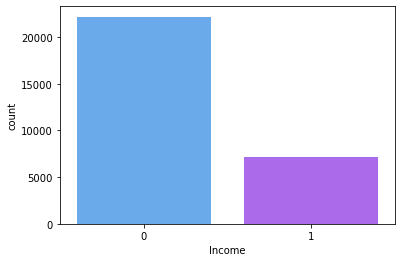

In [68]:
sns.countplot(dfy,palette='cool')
plt.show()

We see that the dataset is imbalanced and will have to be balanced

### Balancing Dataset using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm = SMOTE()
x,y = sm.fit_resample(X,dfy)
x.shape,y.shape

((44356, 12), (44356,))

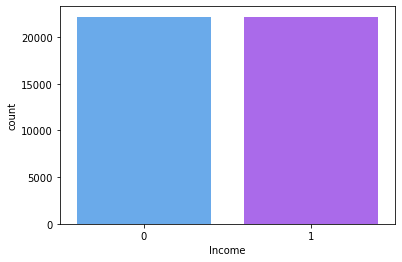

In [71]:
sns.countplot(y,palette='cool')
plt.show()

We see that the dataset is now balanced

### Scaling the Model

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Hours_per_week,Native_country,Sex_ Female,Sex_ Male
0,0.807447,1.681041,-1.154923,0.958358,-0.297445,-0.628328,-0.870891,0.307810,-2.436545,0.123580,-0.606403,0.606403
1,-0.062912,-0.085418,0.431182,-0.670880,-1.877542,-0.092480,0.348299,0.307810,-0.201519,0.123580,-0.606403,0.606403
2,0.999439,-0.085418,0.616895,-1.442145,-0.297445,-0.092480,-0.870891,-3.252229,-0.201519,0.123580,-0.606403,0.606403
3,-0.144563,-0.085418,1.072486,1.380991,-0.297445,-0.628328,1.743464,0.307810,-0.201519,0.123580,1.649219,-1.649219
4,0.741477,-0.085418,-0.155995,-2.177017,0.448223,0.372276,0.348299,-3.252229,-2.226428,-4.551018,1.649219,-1.649219
...,...,...,...,...,...,...,...,...,...,...,...,...
44351,0.172551,-0.085418,-0.102043,0.958358,-0.297445,-0.628328,-0.870891,0.307810,0.776243,0.123580,-0.606403,0.606403
44352,0.530072,1.681041,0.210487,2.117652,-0.297445,0.790436,-0.870891,0.307810,1.814969,0.123580,-0.606403,0.606403
44353,0.667161,-2.588463,-0.774491,0.658083,-0.297445,-1.742413,-0.870891,0.307810,-0.201519,0.123580,-0.606403,0.606403
44354,1.452783,-0.085418,0.019631,0.958358,-0.297445,0.790436,-0.870891,0.307810,-2.464041,0.123580,-0.606403,0.606403


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
lr = LogisticRegression()
max_accuracy = 0
max_random_state = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        max_random_state=i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.7711730668069438 for random_state 76


In [74]:
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=76)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print('Base Model Report :',lr)
print('Accuracy Score',accuracy)
print(classification_report(y_test,pred))

Base Model Report : LogisticRegression()
Accuracy Score 0.765086044938754
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6603
           1       0.76      0.78      0.77      6704

    accuracy                           0.77     13307
   macro avg       0.77      0.76      0.76     13307
weighted avg       0.77      0.77      0.76     13307



In [83]:
from sklearn.model_selection import cross_val_score

In [88]:
for j in range(2,21):
    cv = cross_val_score(lr,X,y,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.7638200018035891 and the accuracy is 0.7711730668069438
at 3 cross validation score is 0.7638651106059724 and the accuracy is 0.7711730668069438
at 4 cross validation score is 0.7639101812607089 and the accuracy is 0.7711730668069438
at 5 cross validation score is 0.7640004933960253 and the accuracy is 0.7711730668069438
at 6 cross validation score is 0.7637975423887773 and the accuracy is 0.7711730668069438
at 7 cross validation score is 0.7638878214959168 and the accuracy is 0.7711730668069438
at 8 cross validation score is 0.7636397873492102 and the accuracy is 0.7711730668069438
at 9 cross validation score is 0.7636623312216738 and the accuracy is 0.7711730668069438
at 10 cross validation score is 0.7637750931956739 and the accuracy is 0.7711730668069438
at 11 cross validation score is 0.7637074570847506 and the accuracy is 0.7711730668069438
at 12 cross validation score is 0.7637750200427709 and the accuracy is 0.7711730668069438
at 13 cross valida

In [81]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=76)
    model.fit(x_test,y_test)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,X,y,cv=5)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [90]:
lr = LogisticRegression()
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 77.23002930788306
Confussion Matrix : 
 [[4894 1709]
 [1321 5383]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      6603
           1       0.76      0.80      0.78      6704

    accuracy                           0.77     13307
   macro avg       0.77      0.77      0.77     13307
weighted avg       0.77      0.77      0.77     13307

Cross Validation Score is  76.40004933960253

Difference between accuracy score and cv is 0.8299799682805258


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 87.26234312767717
Confussion Matrix : 
 [[5330 1273]
 [ 422 6282]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      6603
           1       0.83      0.94      0.88      6704

    accuracy                           0.87     13307
   macro avg       0.88      0.87      0.87     13307
weighted avg       0.88      0.87      0.87     13307

Cross Validation Score is  84.81380932530685

Difference between accuracy score and cv is 2.4485338023703207


In [92]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for model SVC()
The Accuracy Score is 82.7384083565041
Confussion Matrix : 
 [[4956 1647]
 [ 650 6054]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      6603
           1       0.79      0.90      0.84      6704

    accuracy                           0.83     13307
   macro avg       0.84      0.83      0.83     13307
weighted avg       0.83      0.83      0.83     13307

Cross Validation Score is  81.65751103965982

Difference between accuracy score and cv is 1.080897316844272


Report for model DecisionTreeClassifier()
The Accuracy Score is 99.99248515818742
Confussion Matrix : 
 [[6603    0]
 [   1 6703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6603
           1       1.00      1.00      1.00      6704

    accuracy                           1.00     13307
   macro avg       1.00      1.00      1.00     13307
weighted avg       1.00      1.00      1.00     13307

Cross Validation Score is  83.63037344508845

Difference between accuracy score and cv is 16.36211171309897


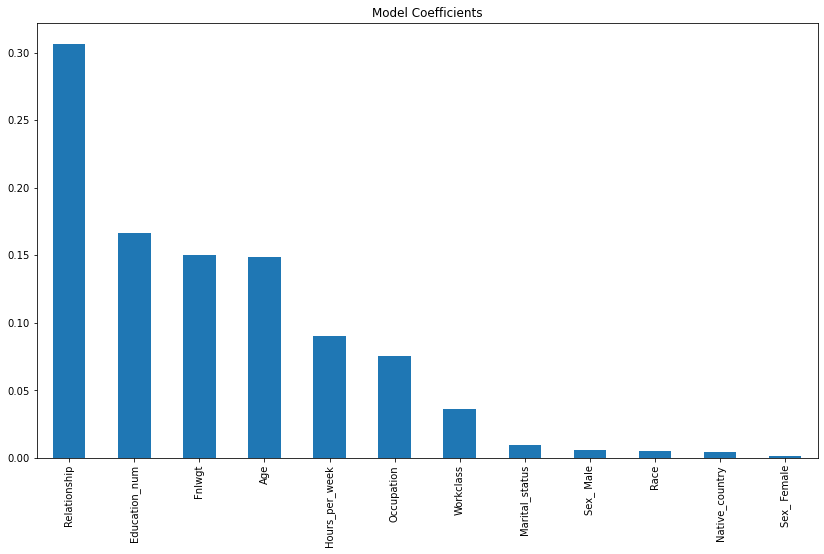

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model RandomForestClassifier()
The Accuracy Score is 99.99248515818742
Confussion Matrix : 
 [[6602    1]
 [   0 6704]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6603
           1       1.00      1.00      1.00      6704

    accuracy                           1.00     13307
   macro avg       1.00      1.00      1.00     13307
weighted avg       1.00      1.00      1.00     13307

Cross Validation Score is  88.29260579883652

Difference between accuracy score and cv is 11.699879359350902


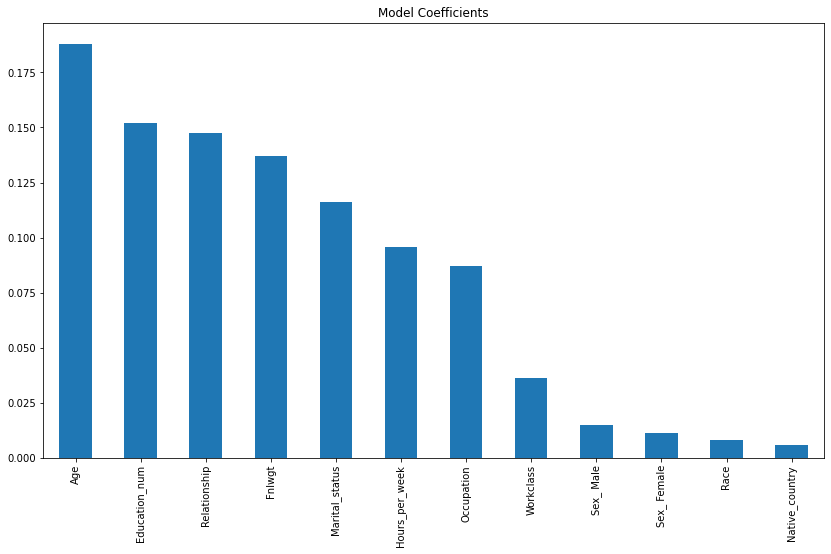

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Model(rf)
coef = pd.Series(rf.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model ExtraTreesClassifier()
The Accuracy Score is 99.99248515818742
Confussion Matrix : 
 [[6603    0]
 [   1 6703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6603
           1       1.00      1.00      1.00      6704

    accuracy                           1.00     13307
   macro avg       1.00      1.00      1.00     13307
weighted avg       1.00      1.00      1.00     13307

Cross Validation Score is  89.54829639622689

Difference between accuracy score and cv is 10.444188761960532


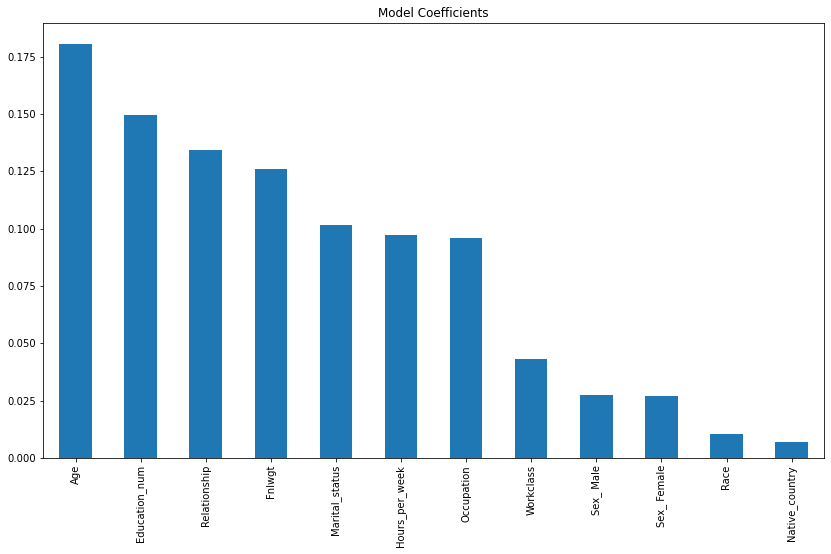

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
Model(et)
coef = pd.Series(et.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model AdaBoostClassifier()
The Accuracy Score is 84.09107988276847
Confussion Matrix : 
 [[5299 1304]
 [ 813 5891]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6603
           1       0.82      0.88      0.85      6704

    accuracy                           0.84     13307
   macro avg       0.84      0.84      0.84     13307
weighted avg       0.84      0.84      0.84     13307

Cross Validation Score is  83.54908939768787

Difference between accuracy score and cv is 0.5419904850806034


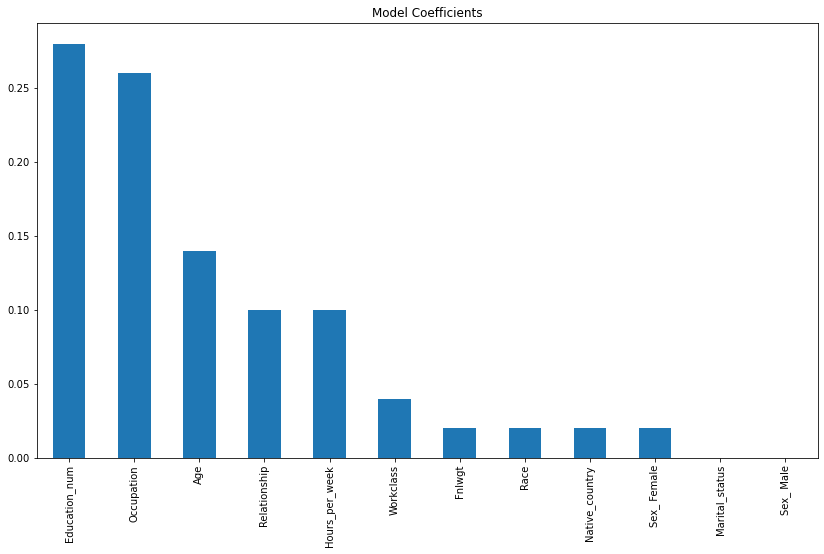

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
Model(ad)
coef = pd.Series(ad.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model GradientBoostingClassifier()
The Accuracy Score is 86.41316600285563
Confussion Matrix : 
 [[5428 1175]
 [ 633 6071]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6603
           1       0.84      0.91      0.87      6704

    accuracy                           0.86     13307
   macro avg       0.87      0.86      0.86     13307
weighted avg       0.87      0.86      0.86     13307

Cross Validation Score is  84.72145385329183

Difference between accuracy score and cv is 1.6917121495637986


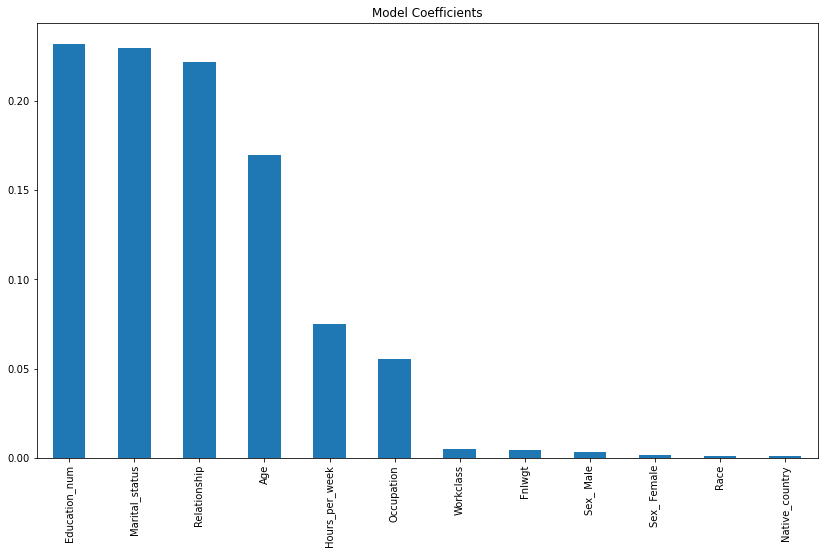

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
Model(gb)
coef = pd.Series(gb.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

LogisticRegression,SVC and AdaBoostClassifier the 3 best Models.

### HyperParameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [112]:
ad = AdaBoostClassifier()
parameters = {
    'n_estimators': [2,5,6,7,8,9,10,14],
    'learning_rate': [0.0001,0.001,0.01,0.1,0.8,0.89,0.9,10],
    'algorithm': ['SAMME', 'SAMME.R']
}
gcv = GridSearchCV(ad,parameters,cv=5,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.89, 'n_estimators': 14}

In [114]:
gcv.best_estimator_

AdaBoostClassifier(learning_rate=0.89, n_estimators=14)

In [111]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(learning_rate=.89, n_estimators=14)
Model(ad)

Report for model AdaBoostClassifier(learning_rate=0.89, n_estimators=14)
The Accuracy Score is 81.83662733899452
Confussion Matrix : 
 [[5148 1455]
 [ 962 5742]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6603
           1       0.80      0.86      0.83      6704

    accuracy                           0.82     13307
   macro avg       0.82      0.82      0.82     13307
weighted avg       0.82      0.82      0.82     13307

Cross Validation Score is  81.82437068373773

Difference between accuracy score and cv is 0.01225665525679176


In [77]:
from sklearn.svm import SVC
svc = SVC()

parameters = {'C': [0.1,1,0.01,10],'kernel': ['linear', 'poly', 'rbf']}
gcv = GridSearchCV(svc,parameters,cv=5,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [78]:
gcv.best_estimator_

SVC(C=10)

In [106]:
from sklearn.svm import SVC
svc = SVC(C=10)
Model(svc)

Report for model SVC(C=10)
The Accuracy Score is 84.88765311490192
Confussion Matrix : 
 [[5093 1510]
 [ 501 6203]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      6603
           1       0.80      0.93      0.86      6704

    accuracy                           0.85     13307
   macro avg       0.86      0.85      0.85     13307
weighted avg       0.86      0.85      0.85     13307

Cross Validation Score is  82.87494362386269

Difference between accuracy score and cv is 2.0127094910392316


In [89]:
lr = LogisticRegression()

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.0011,0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gcv = GridSearchCV(lr,parameters,cv=5,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [90]:
gcv.best_estimator_

LogisticRegression(C=0.001, solver='newton-cg')

In [102]:
lr = LogisticRegression(C=0.001, solver='newton-cg')
Model(lr)

Report for model LogisticRegression(C=0.001, solver='newton-cg')
The Accuracy Score is 76.65890133012701
Confussion Matrix : 
 [[4771 1832]
 [1274 5430]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      6603
           1       0.75      0.81      0.78      6704

    accuracy                           0.77     13307
   macro avg       0.77      0.77      0.77     13307
weighted avg       0.77      0.77      0.77     13307

Cross Validation Score is  76.54208340791705

Difference between accuracy score and cv is 0.11681792220996101


We See that the AdaBoostClassifier with HyperParameter Tuning yields the best result.

### Final Model : AdaBoostClassifier with HyperParameter Tuning

Report for model AdaBoostClassifier(learning_rate=0.89, n_estimators=14)
The Accuracy Score is 81.83662733899452
Confussion Matrix : 
 [[5148 1455]
 [ 962 5742]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6603
           1       0.80      0.86      0.83      6704

    accuracy                           0.82     13307
   macro avg       0.82      0.82      0.82     13307
weighted avg       0.82      0.82      0.82     13307

Cross Validation Score is  81.82437068373773

Difference between accuracy score and cv is 0.01225665525679176


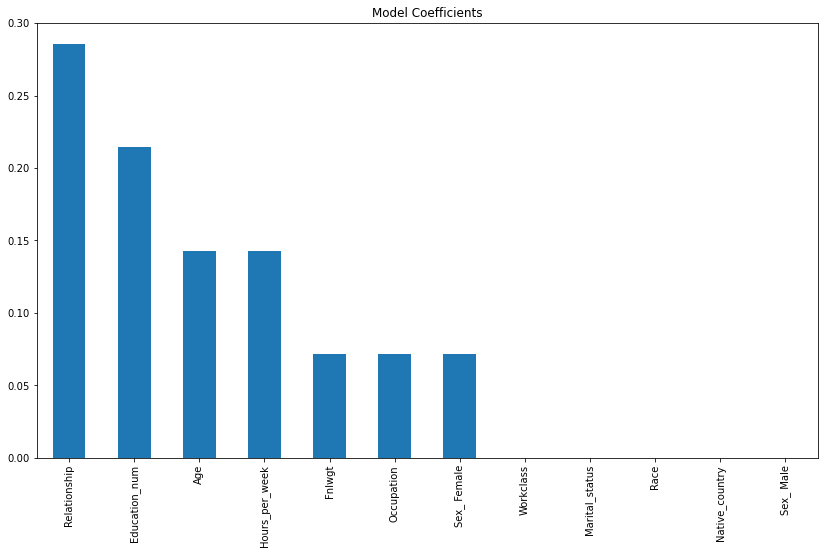

In [117]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(learning_rate=.89, n_estimators=14)
Model(ad)
coef = pd.Series(ad.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

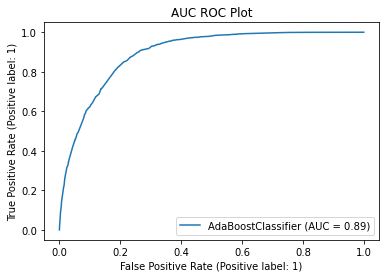

In [116]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ad,x_test,y_test)
plt.title('AUC ROC Plot')
plt.show()

In [118]:
import pickle

file_name = 'Census_Income_Prediction.pkl'
pickle.dump(ad,open(file_name,'wb'))